Kích thước của X_seq: (2931, 60, 1)
Kích thước của y_seq: (2931, 1)
Kích thước tập huấn luyện: X_train (2344, 60, 1), y_train (2344, 1)
Kích thước tập kiểm tra: X_test (587, 60, 1), y_test (587, 1)

--- Cấu trúc Mô hình LSTM với Tham số Cố định ---


<ipython-input-1-8818c03b15b0>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_features.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 96)             │        37,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,729 (147.38 KB)

 Trainable params: 37,729 (147.38 KB)

 Non-trainable params: 0 (0.00 B)


--- Bắt đầu Huấn luyện Mô hình LSTM ---
Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 5.7133e-04 - val_loss: 0.0475 - learning_rate: 1.4299e-04
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0030 - val_loss: 0.0119 - learning_rate: 1.4299e-04
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 8.5822e-04 - val_loss: 0.0030 - learning_rate: 1.4299e-04
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 1.4918e-04 - val_loss: 0.0028 - learning_rate: 1.4299e-04
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 1.3280e-04 - val_loss: 0.0027 - learning_rate: 1.4299e-04
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 1.3048e-04 - val_loss: 0.0027 - learning_rate: 1.4299e-04
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 1.1395e-04 - val_loss: 0.0025 - learning_rate: 1.4299e-04
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 1.0683e-04 - val_loss: 0.0024 - learning_rate: 1.4299e-04
Epoch 9/100
74/74 ━

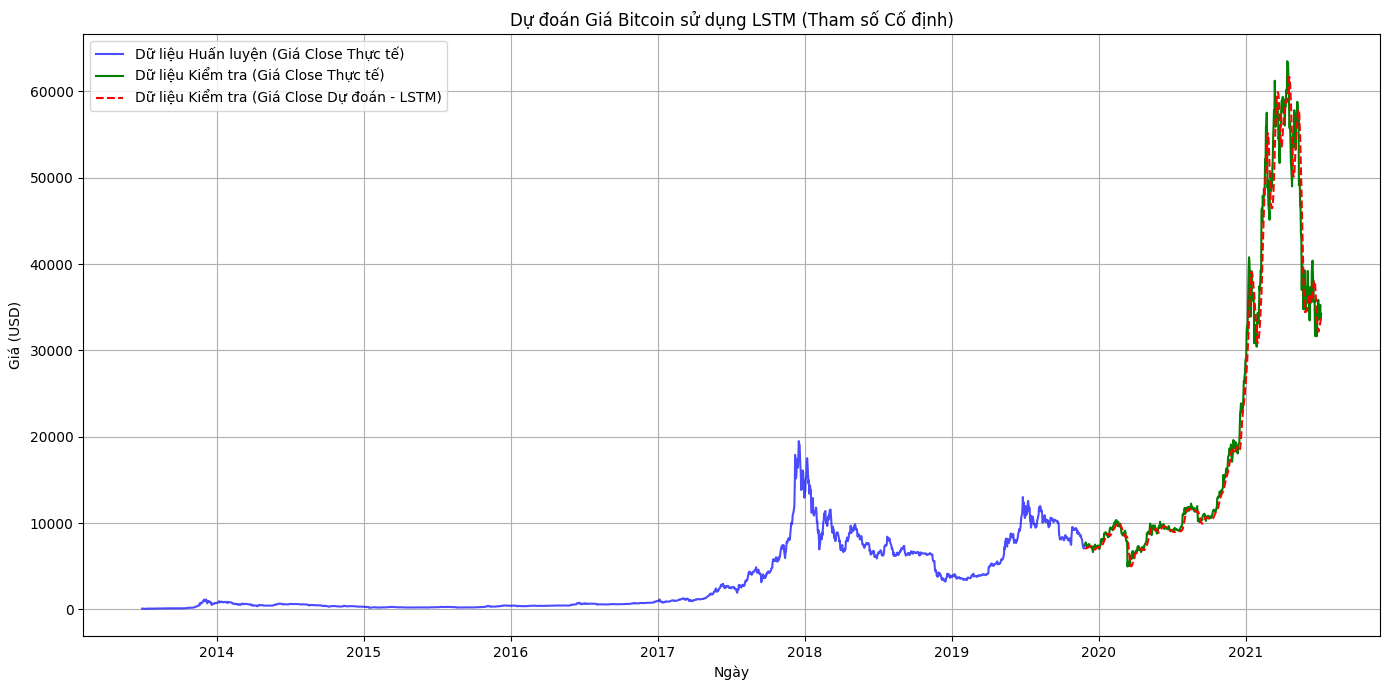

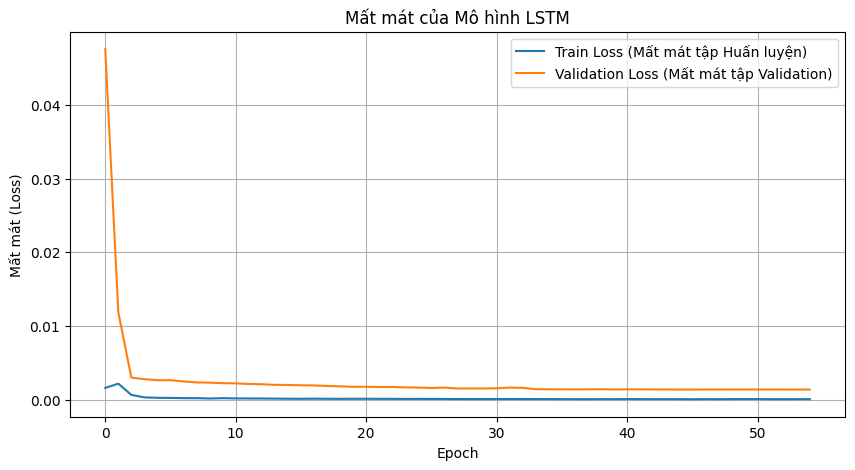

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

--- Dự báo Ngày Tiếp theo (1 bước tới sử dụng LSTM - Tham số Cố định) ---
Giá Close thực tế cuối cùng vào 2021-07-06: $34235.19

Giá Close dự đoán cho 2021-07-07: $33905.49


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Để đảm bảo kết quả có thể tái tạo
np.random.seed(42)
tf.random.set_seed(42)

# 1. Tải dữ liệu
try:
    df = pd.read_csv('/content/coin_Bitcoin.csv') # Đảm bảo file này tồn tại
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file coin_Bitcoin.csv. Vui lòng đảm bảo file nằm trong thư mục hiện tại hoặc cung cấp đường dẫn chính xác.")
    # Tạo DataFrame mẫu nếu file không tồn tại để code có thể chạy
    date_rng = pd.date_range(start='2017-01-01', end='2021-07-31', freq='D')
    data = {
        'Date': date_rng,
        'Close': np.random.rand(len(date_rng)) * 50000 + 5000
    }
    df = pd.DataFrame(data)
    print("Đang sử dụng dữ liệu mẫu (chỉ có cột 'Close') vì không tìm thấy coin_Bitcoin.csv.")

# 2. Tiền xử lý
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

df_features = df[['Close']].copy()
df_features.fillna(method='ffill', inplace=True)

if df_features.empty:
    print("DataFrame trống sau khi xử lý ban đầu.")
    exit()

# 3. Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_features)

# 4. Tạo chuỗi dữ liệu (Sequences)
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 60
num_features = scaled_data.shape[1] # Sẽ là 1

X_seq, y_seq = create_sequences(scaled_data, sequence_length)

if X_seq.shape[0] == 0:
    print(f"Không đủ dữ liệu để tạo chuỗi với độ dài {sequence_length}. Cần ít nhất {sequence_length + 1} điểm dữ liệu.")
    exit()

print(f"Kích thước của X_seq: {X_seq.shape}")
print(f"Kích thước của y_seq: {y_seq.shape}")

# 5. Chia dữ liệu theo thứ tự thời gian
split_ratio = 0.8
split_index = int(len(X_seq) * split_ratio)

X_train, y_train = X_seq[:split_index], y_seq[:split_index]
X_test, y_test = X_seq[split_index:], y_seq[split_index:]

print(f"Kích thước tập huấn luyện: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Kích thước tập kiểm tra: X_test {X_test.shape}, y_test {y_test.shape}")

if len(X_train) == 0 or len(X_test) == 0:
    print("Tập huấn luyện hoặc tập kiểm tra trống sau khi tạo chuỗi. Điều chỉnh tỷ lệ chia hoặc kiểm tra dữ liệu.")
    exit()

# 6. Xây dựng Mô hình LSTM với Tham số Cố định
def build_fixed_lstm_model(sequence_length, num_features, lstm_units, lstm_dropout_rate, learning_rate):
    model = Sequential()
    # Lớp LSTM đầu tiên (và duy nhất theo yêu cầu)
    model.add(LSTM(units=lstm_units,
                   return_sequences=False, # False vì đây là lớp LSTM cuối cùng trước lớp Dense
                   input_shape=(sequence_length, num_features)))
    model.add(Dropout(lstm_dropout_rate))

    # Lớp Output
    model.add(Dense(units=1)) # Dự đoán 1 giá trị (giá Close)

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='mean_squared_error') # Hàm mất mát phổ biến cho hồi quy
    return model

# Định nghĩa các tham số cố định được cung cấp
fixed_lstm_units = 96
fixed_lstm_dropout = 0.5
fixed_learning_rate = 0.00014298838601286396

# Xây dựng mô hình
model = build_fixed_lstm_model(
    sequence_length=sequence_length,
    num_features=num_features,
    lstm_units=fixed_lstm_units,
    lstm_dropout_rate=fixed_lstm_dropout,
    learning_rate=fixed_learning_rate
)

print("\n--- Cấu trúc Mô hình LSTM với Tham số Cố định ---")
model.summary()

# 7. Huấn luyện Mô hình LSTM
print("\n--- Bắt đầu Huấn luyện Mô hình LSTM ---")
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001) # Giảm min_lr một chút

history = model.fit(
    X_train, y_train,
    epochs=100, # Số epochs để huấn luyện
    batch_size=32, # Kích thước batch
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr],
    shuffle=False # Không xáo trộn dữ liệu chuỗi thời gian
)
print("\n--- Kết thúc Huấn luyện Mô hình LSTM ---")

# 8. Đánh giá Mô hình
y_pred_scaled_train = model.predict(X_train)
y_pred_scaled_test = model.predict(X_test)

# Chuyển đổi dữ liệu dự đoán và thực tế về thang đo gốc
y_pred_train = scaler.inverse_transform(y_pred_scaled_train)
y_train_orig = scaler.inverse_transform(y_train)

y_pred_test = scaler.inverse_transform(y_pred_scaled_test)
y_test_orig = scaler.inverse_transform(y_test)

print("\n--- Đánh giá Mô hình (Mô hình LSTM với Tham số Cố định) ---")
rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_pred_train))
mae_train = mean_absolute_error(y_train_orig, y_pred_train)
r2_train = r2_score(y_train_orig, y_pred_train)
mape_train = mean_absolute_percentage_error(y_train_orig, y_pred_train) * 100

print(f"RMSE tập huấn luyện: ${rmse_train:.2f}")
print(f"MAE tập huấn luyện: ${mae_train:.2f}")
print(f"R-squared tập huấn luyện: {r2_train:.4f}")
print(f"MAPE tập huấn luyện: {mape_train:.2f}%")

rmse_test = np.sqrt(mean_squared_error(y_test_orig, y_pred_test))
mae_test = mean_absolute_error(y_test_orig, y_pred_test)
r2_test = r2_score(y_test_orig, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test_orig, y_pred_test) * 100
print(f"\nRMSE tập kiểm tra: ${rmse_test:.2f}")
print(f"MAE tập kiểm tra: ${mae_test:.2f}")
print(f"R-squared tập kiểm tra: {r2_test:.4f}")
print(f"MAPE tập kiểm tra: {mape_test:.2f}%")

# 9. Trực quan hóa dự đoán
train_dates_index = df_features.index[sequence_length : split_index + sequence_length]
test_dates_index = df_features.index[split_index + sequence_length : split_index + sequence_length + len(y_test_orig)]

plt.figure(figsize=(14, 7))
if len(y_train_orig) > 0 and len(train_dates_index) == len(y_train_orig):
    plt.plot(train_dates_index, y_train_orig, label='Dữ liệu Huấn luyện (Giá Close Thực tế)', color='blue', alpha=0.7)
else:
    print("Cảnh báo: Không thể vẽ dữ liệu huấn luyện do không khớp độ dài hoặc dữ liệu trống.")

if len(y_test_orig) > 0 and len(test_dates_index) == len(y_test_orig):
    plt.plot(test_dates_index, y_test_orig, label='Dữ liệu Kiểm tra (Giá Close Thực tế)', color='green')
else:
    print("Cảnh báo: Không thể vẽ dữ liệu kiểm tra thực tế do không khớp độ dài hoặc dữ liệu trống.")

if len(y_pred_test) > 0 and len(test_dates_index) == len(y_pred_test):
    plt.plot(test_dates_index, y_pred_test, label='Dữ liệu Kiểm tra (Giá Close Dự đoán - LSTM)', color='red', linestyle='--')
else:
    print("Cảnh báo: Không thể vẽ dữ liệu kiểm tra dự đoán do không khớp độ dài hoặc dữ liệu trống.")

plt.title('Dự đoán Giá Bitcoin sử dụng LSTM (Tham số Cố định)')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Vẽ đồ thị loss của quá trình huấn luyện & validation
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss (Mất mát tập Huấn luyện)')
plt.plot(history.history['val_loss'], label='Validation Loss (Mất mát tập Validation)')
plt.title('Mất mát của Mô hình LSTM')
plt.ylabel('Mất mát (Loss)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# 10. Thực hiện dự báo 1 bước tới
last_sequence_scaled = scaled_data[-sequence_length:]
last_sequence_reshaped = last_sequence_scaled.reshape(1, sequence_length, num_features)

next_day_pred_scaled = model.predict(last_sequence_reshaped)
next_day_prediction = scaler.inverse_transform(next_day_pred_scaled)

last_actual_date = df_features.index[-1]
next_prediction_date = last_actual_date + pd.Timedelta(days=1)

print(f"\n--- Dự báo Ngày Tiếp theo (1 bước tới sử dụng LSTM - Tham số Cố định) ---")
print(f"Giá Close thực tế cuối cùng vào {last_actual_date.date()}: ${df_features['Close'].iloc[-1]:.2f}")
print(f"\nGiá Close dự đoán cho {next_prediction_date.date()}: ${next_day_prediction[0,0]:.2f}")